___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
#data
import numpy as np
import pandas as pd
#tensorflow/keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#optimization
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
#model saving
import pickle
from tensorflow.keras.models import load_model

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#valdation split
X_train_v, X_val, y_train_v, y_val = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train)

In [4]:
X_train_v.max()

255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
X_train_v.shape

(54000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_val.shape

(6000, 28, 28)

In [10]:
y_val.shape

(6000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [11]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

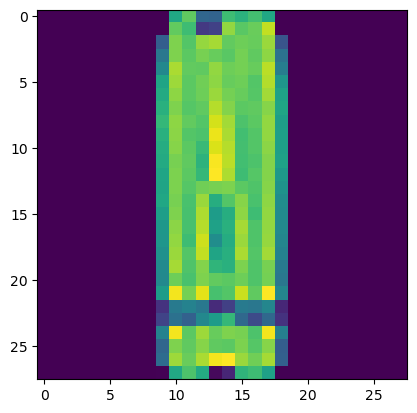

In [12]:
plt.imshow(X_train_v[1])
plt.show()

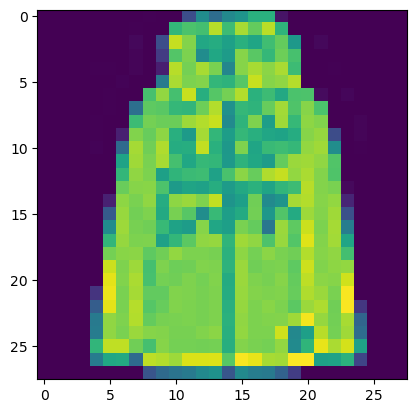

In [13]:
plt.imshow(X_train_v[20])
plt.show()

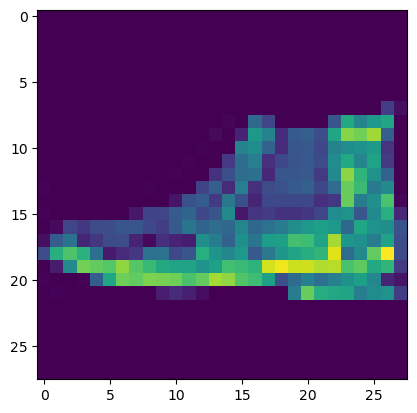

In [14]:
plt.imshow(X_train_v[11])  
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
x_train.max()

255

In [16]:
X_train_v.max()

255

In [17]:
X_val.max()

255

In [18]:
x_test.max()

255

In [19]:
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")
X_train /= 255
X_test /= 255

In [20]:
X_train_v = X_train_v.astype("float32")
X_val = X_val.astype("float32")
X_train_v /= 255
X_val /= 255

In [21]:
X_train_v.max()

1.0

In [22]:
X_train.max()

1.0

In [23]:
X_val.max()

1.0

In [24]:
X_test.max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [25]:
X_train_vs = np.expand_dims(X_train_v, -1)
X_val_s = np.expand_dims(X_val, -1)

In [26]:
X_train_s = np.expand_dims(X_train, -1)
X_test_s = np.expand_dims(X_test, -1)

In [27]:
X_train_s.shape

(60000, 28, 28, 1)

In [28]:
X_val_s.shape

(6000, 28, 28, 1)

In [29]:
X_train_vs.shape

(54000, 28, 28, 1)

In [30]:
X_test_s.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [31]:
y_train_vc = to_categorical(y_train_v)
y_val_vc = to_categorical(y_val)

In [32]:
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

In [33]:
y_train_vc.max()

1.0

In [34]:
y_val_vc.max()

1.0

In [35]:
y_train_c.max()

1.0

In [36]:
y_test_c.max()

1.0

# Modeling

## Create the model 

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu",padding="same"))
model.add(MaxPool2D(pool_size=(2, 2), strides = (1, 1)))


model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 23328)             0         
                                                                 
 dense (Dense)               (None, 128)               2986112   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,987,722
Trainable params: 2,987,722
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [40]:
model_history = model.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/30


2023-11-01 22:27:06.752343: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 152/1688 [=>............................] - ETA: 33s - loss: 0.7422 - accuracy: 0.7463

1688/1688 [==============================] - 26s 15ms/step - loss: 0.3795 - accuracy: 0.8654 - val_loss: 0.3195 - val_accuracy: 0.8828
Epoch 2/30
1688/1688 [==============================] - 19s 11ms/step - loss: 0.2502 - accuracy: 0.9092 - val_loss: 0.2617 - val_accuracy: 0.9052
Epoch 3/30
1688/1688 [==============================] - 19s 11ms/step - loss: 0.2073 - accuracy: 0.9246 - val_loss: 0.2409 - val_accuracy: 0.9120
Epoch 4/30
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1764 - accuracy: 0.9355 - val_loss: 0.2429 - val_accuracy: 0.9175
Epoch 5/30
1688/1688 [==============================] - 19s 11ms/step - loss: 0.1515 - accuracy: 0.9456 - val_loss: 0.2704 - val_accuracy: 0.9085
Epoch 6/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1321 - accuracy: 0.9516 - val_loss: 0.3138 - val_accuracy: 0.9055
Epoch 7/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1161 - accuracy: 0.9582 - val_loss: 0.2650 - val_accura

In [41]:
summary_model = pd.DataFrame(model.history.history)
summary_model.head()

,loss,accuracy,val_loss,val_accuracy
0,0.379548,0.865407,0.319502,0.882833
1,0.250182,0.909204,0.261696,0.905167
2,0.207271,0.924556,0.240941,0.912000
3,0.176426,0.935537,0.242852,0.917500
4,0.151543,0.945630,0.270354,0.908500


In [42]:
loss, accuracy  = model.evaluate(X_test_s, y_test_c, verbose=0)
loss_model= print("loss: ", loss)
accuracy_model= print('accuracy',accuracy) 


loss:  0.2579350769519806
accuracy 0.9078999757766724


**TASK 7: Plot values of metrics you used in your model.**

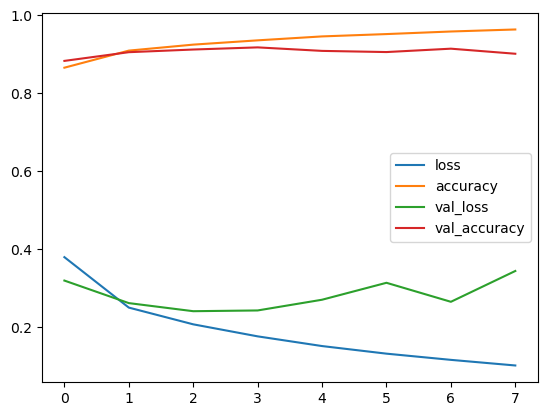

In [43]:
loss_df_model = pd.DataFrame(model_history.history)
loss_df_model.plot();

## Model L1:

Dropout (0.5) 

L2 Regularization 

hidden layer with 40 neurons



In [44]:
model_l1 = Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 

        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),

        Flatten(),
       

        Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
        Dense(10,activation='softmax')

        

        
       
    ]
)
model_l1.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [45]:
model_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20412)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2612864   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,614,434
Trainable params: 2,614,434
Non-trainable params: 0
____________________________________________

##  Model L1 Training 

In [46]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [47]:
model_l1_history = model_l1.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))#32 or less batch size

Epoch 1/30


1688/1688 [==============================] - 26s 15ms/step - loss: 12.5545 - accuracy: 0.1711 - val_loss: 12.1283 - val_accuracy: 0.1000
Epoch 2/30
1688/1688 [==============================] - 22s 13ms/step - loss: 12.1558 - accuracy: 0.2166 - val_loss: 12.1258 - val_accuracy: 0.2113
Epoch 3/30
1688/1688 [==============================] - 22s 13ms/step - loss: 12.1403 - accuracy: 0.2701 - val_loss: 12.0677 - val_accuracy: 0.2908
Epoch 4/30
1688/1688 [==============================] - 23s 13ms/step - loss: 12.1328 - accuracy: 0.2840 - val_loss: 12.0461 - val_accuracy: 0.4090
Epoch 5/30
1688/1688 [==============================] - 23s 13ms/step - loss: 12.1219 - accuracy: 0.3558 - val_loss: 12.0633 - val_accuracy: 0.3802
Epoch 6/30
1688/1688 [==============================] - 23s 13ms/step - loss: 12.1108 - accuracy: 0.3996 - val_loss: 12.0577 - val_accuracy: 0.3270
Epoch 7/30
1688/1688 [==============================] - 22s 13ms/step - loss: 12.1071 - accuracy: 0.4115 - val_loss: 12.051

In [48]:
summary_model_l1 = pd.DataFrame(model_l1.history.history)
summary_model_l1.head()

,loss,accuracy,val_loss,val_accuracy
0,12.554542,0.171074,12.128340,0.100000
1,12.155807,0.216630,12.125792,0.211333
2,12.140280,0.270056,12.067726,0.290833
3,12.132835,0.284000,12.046055,0.409000
4,12.121885,0.355815,12.063320,0.380167


In [49]:
loss, accuracy  = model_l1.evaluate(X_test_s, y_test_c, verbose=0)
loss_l1= print("loss: ", loss)
accuracy_l1= print('accuracy',accuracy) 


loss:  11.995551109313965
accuracy 0.6513000130653381


**TASK 7: Plot values of metrics you used in your model.**

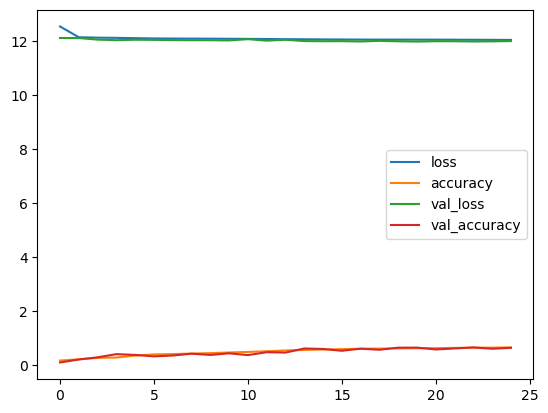

In [50]:
loss_df_model_l1 = pd.DataFrame(model_l1_history.history)
loss_df_model_l1.plot();

## Model L2

In [51]:
model_l2= Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 

        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),

        Flatten(),
        

        Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        
        Dense(10,activation='softmax')       
    ]
)
model_l2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [52]:
model_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 20412)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2612864   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,614,434
Trainable params: 2,614,434
Non-trainable params: 0
____________________________________________

##  Model L2 Training 

In [53]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [54]:
model_l2_history = model_l1.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/30
   8/1688 [..............................] - ETA: 27s - loss: 12.0599 - accuracy: 0.6211

1688/1688 [==============================] - 25s 15ms/step - loss: 12.0666 - accuracy: 0.6318 - val_loss: 12.0126 - val_accuracy: 0.6327
Epoch 2/30
1688/1688 [==============================] - 24s 14ms/step - loss: 12.0642 - accuracy: 0.6409 - val_loss: 11.9925 - val_accuracy: 0.6550
Epoch 3/30
1688/1688 [==============================] - 25s 15ms/step - loss: 12.0616 - accuracy: 0.6446 - val_loss: 12.0021 - val_accuracy: 0.6322
Epoch 4/30
1688/1688 [==============================] - 25s 15ms/step - loss: 12.0599 - accuracy: 0.6504 - val_loss: 11.9989 - val_accuracy: 0.6628
Epoch 5/30
1688/1688 [==============================] - 26s 15ms/step - loss: 12.0576 - accuracy: 0.6549 - val_loss: 11.9901 - val_accuracy: 0.6655
Epoch 6/30
1688/1688 [==============================] - 25s 15ms/step - loss: 12.0538 - accuracy: 0.6606 - val_loss: 11.9873 - val_accuracy: 0.6698
Epoch 7/30
1688/1688 [==============================] - 25s 15ms/step - loss: 12.0519 - accuracy: 0.6641 - val_loss: 11.993

In [56]:
summary_model_l2 = pd.DataFrame(model_l2_history.history)
summary_model_l2.head()

,loss,accuracy,val_loss,val_accuracy
0,12.066643,0.631833,12.012641,0.632667
1,12.064165,0.640944,11.992537,0.655000
2,12.061591,0.644648,12.002132,0.632167
3,12.059912,0.650370,11.998899,0.662833
4,12.057601,0.654907,11.990128,0.665500


In [57]:
loss, accuracy = model_l2.evaluate(X_test_s, y_test_c, verbose=0)
loss_l2= print("loss: ", loss)
accuracy_l2= print('accuracy',accuracy) 


loss:  0.9768497943878174
accuracy 0.1834000051021576


**TASK 7: Plot values of metrics you used in your model.**

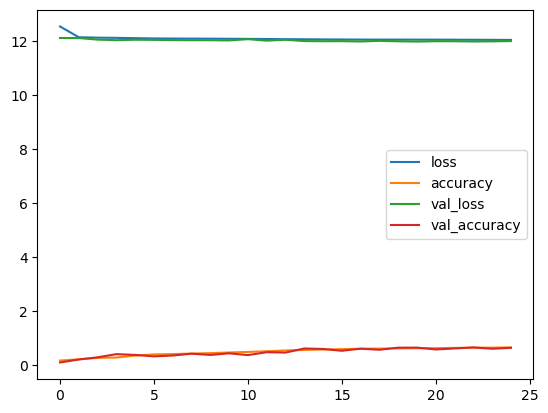

In [58]:
loss_df_model_l2 = pd.DataFrame(model_l1_history.history)
loss_df_model_l2.plot();

## Model droupout

In [59]:
model_dropout = Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 
        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),

        Flatten(),
        Dropout(0.5),

        Dense(128,activation='relu'),
        Dense(10,activation='softmax')
       
    ]
)
model_dropout.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [60]:
model_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 20412)             0         
                                                                 
 dropout (Dropout)           (None, 20412)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2612864   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

##  Model dropout Training 

In [61]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [62]:
model_dropout_history = model_dropout.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/30


1688/1688 [==============================] - 24s 14ms/step - loss: 0.0792 - accuracy: 0.8453 - val_loss: 0.0596 - val_accuracy: 0.8818
Epoch 2/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0551 - accuracy: 0.8924 - val_loss: 0.0495 - val_accuracy: 0.8995
Epoch 3/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0486 - accuracy: 0.9042 - val_loss: 0.0468 - val_accuracy: 0.9060
Epoch 4/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0444 - accuracy: 0.9129 - val_loss: 0.0481 - val_accuracy: 0.9042
Epoch 5/30
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0418 - accuracy: 0.9189 - val_loss: 0.0456 - val_accuracy: 0.9113
Epoch 6/30
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0392 - accuracy: 0.9239 - val_loss: 0.0473 - val_accuracy: 0.9075
Epoch 7/30
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0374 - accuracy: 0.9286 - val_loss: 0.0461 - val_accura

In [63]:
summary_model_dropout = pd.DataFrame(model_dropout_history.history)
summary_model_dropout.head()

,loss,accuracy,val_loss,val_accuracy
0,0.079174,0.845315,0.059584,0.881833
1,0.055119,0.892370,0.049473,0.899500
2,0.048614,0.904222,0.046757,0.906000
3,0.044448,0.912870,0.048060,0.904167
4,0.041767,0.918870,0.045632,0.911333


In [64]:
loss, accuracy = model_dropout.evaluate(X_test_s, y_test_c, verbose=0)
loss_drout= print("loss: ", loss)
accuracy_dropout= print('accuracy',accuracy) 


loss:  0.046753302216529846
accuracy 0.9129999876022339


**.TASK 7: Plot values of metrics you used in your model.**

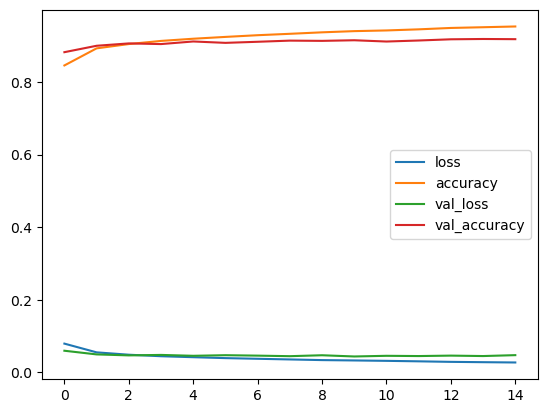

In [65]:
loss_df_model_dropout = pd.DataFrame(model_dropout_history.history)
loss_df_model_dropout.plot();

## Model layer

In [66]:
model_layer = Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 

        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),

        Flatten(),

        Dense(128,activation='relu'),

        Dense(64,activation='relu'),
        
        Dense(10,activation='softmax')

    ]
)
model_layer.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [67]:
model_layer.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 20412)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2612864   
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                      

##  Model layer Training 

In [68]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [69]:
model_layer_history = model_layer.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/30


1688/1688 [==============================] - 22s 13ms/step - loss: 0.0812 - accuracy: 0.8376 - val_loss: 0.0612 - val_accuracy: 0.8757
Epoch 2/30
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0522 - accuracy: 0.8959 - val_loss: 0.0489 - val_accuracy: 0.8992
Epoch 3/30
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0443 - accuracy: 0.9114 - val_loss: 0.0544 - val_accuracy: 0.8873
Epoch 4/30
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0395 - accuracy: 0.9211 - val_loss: 0.0427 - val_accuracy: 0.9125
Epoch 5/30
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0349 - accuracy: 0.9313 - val_loss: 0.0481 - val_accuracy: 0.9088
Epoch 6/30
1688/1688 [==============================] - 33s 19ms/step - loss: 0.0317 - accuracy: 0.9381 - val_loss: 0.0473 - val_accuracy: 0.9065
Epoch 7/30
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0284 - accuracy: 0.9460 - val_loss: 0.0554 - val_accura

In [70]:
summary_model_layer = pd.DataFrame(model_layer.history.history)
summary_model_layer.head()

,loss,accuracy,val_loss,val_accuracy
0,0.081207,0.837611,0.061153,0.875667
1,0.052234,0.895870,0.048922,0.899167
2,0.044303,0.911352,0.054415,0.887333
3,0.039476,0.921093,0.042662,0.912500
4,0.034876,0.931278,0.048083,0.908833


In [71]:
loss, accuracy = model_layer.evaluate(X_test_s, y_test_c, verbose=0)
loss_layer= print("loss: ", loss)
accuracy_layer= print('accuracy',accuracy) 



loss:  0.04617813229560852
accuracy 0.9067999720573425


**TASK 7: Plot values of metrics you used in your model.**

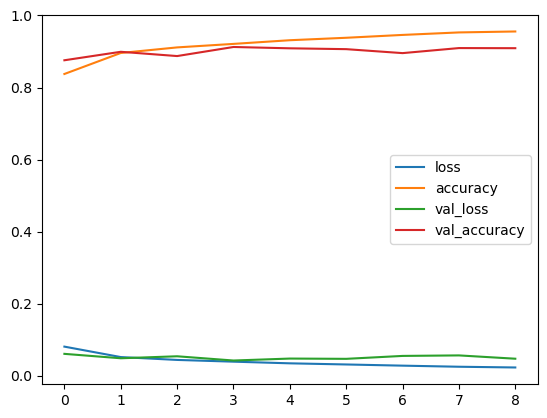

In [72]:
loss_df_model_layer = pd.DataFrame(model_layer_history.history)
loss_df_model_layer.plot();

Final model

In [73]:
model_final = Sequential(
    [
        Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"), 

        MaxPool2D(pool_size=(2, 2), strides = (1, 1)),

        Flatten(),
        Dropout(0.5),

        Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),

        Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        
        Dense(10,activation='softmax')
        
    ]
)
model_final.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [74]:
model_final.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 20412)             0         
                                                                 
 dropout_1 (Dropout)         (None, 20412)             0         
                                                                 
 dense_11 (Dense)            (None, 128)               2612864   
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                      

##  Model final Training 

In [75]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [76]:
model_final_history = model_final.fit(X_train_vs, y_train_vc, batch_size=32, epochs=30, callbacks=[early_stop], validation_data = (X_val_s, y_val_vc))

Epoch 1/30


1688/1688 [==============================] - 41s 24ms/step - loss: 0.1605 - accuracy: 0.7901 - val_loss: 0.1233 - val_accuracy: 0.8183
Epoch 2/30
1688/1688 [==============================] - 40s 24ms/step - loss: 0.1121 - accuracy: 0.8443 - val_loss: 0.1113 - val_accuracy: 0.8260
Epoch 3/30
1688/1688 [==============================] - 40s 24ms/step - loss: 0.1020 - accuracy: 0.8553 - val_loss: 0.1045 - val_accuracy: 0.8417
Epoch 4/30
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0969 - accuracy: 0.8616 - val_loss: 0.1031 - val_accuracy: 0.8365
Epoch 5/30
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0938 - accuracy: 0.8627 - val_loss: 0.1201 - val_accuracy: 0.8040
Epoch 6/30
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0919 - accuracy: 0.8656 - val_loss: 0.0970 - val_accuracy: 0.8502
Epoch 7/30
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0903 - accuracy: 0.8686 - val_loss: 0.0843 - val_accura

In [77]:
summary_model_final = pd.DataFrame(model_final.history.history)
summary_model_final.head()

,loss,accuracy,val_loss,val_accuracy
0,0.160518,0.790130,0.123329,0.818333
1,0.112086,0.844259,0.111275,0.826000
2,0.101975,0.855259,0.104527,0.841667
3,0.096850,0.861593,0.103096,0.836500
4,0.093844,0.862704,0.120140,0.804000


In [78]:
loss, accuracy = model_final.evaluate(X_test_s, y_test_c, verbose=0)
loss_final= print("loss: ", loss)
accuracy_final = print('accuracy',accuracy) 


loss:  0.08225970715284348
accuracy 0.8813999891281128


**TASK 7: Plot values of metrics you used in your model.**

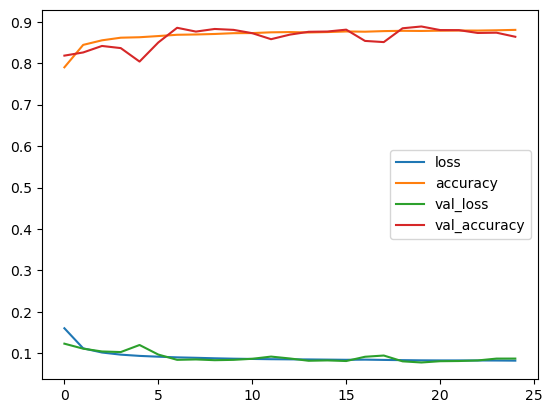

In [79]:
loss_df_model_final = pd.DataFrame(model_final_history.history)
loss_df_model_final.plot();

## compare models 

In [84]:
m1= summary_model.mean().values
m2= summary_model_l1.mean().values
m3= summary_model_l2.mean().values
m4= summary_model_dropout.mean().values
m5= summary_model_layer.mean().values
m6= summary_model_final.mean().values
m1.head

KeyError: 'accuracy'

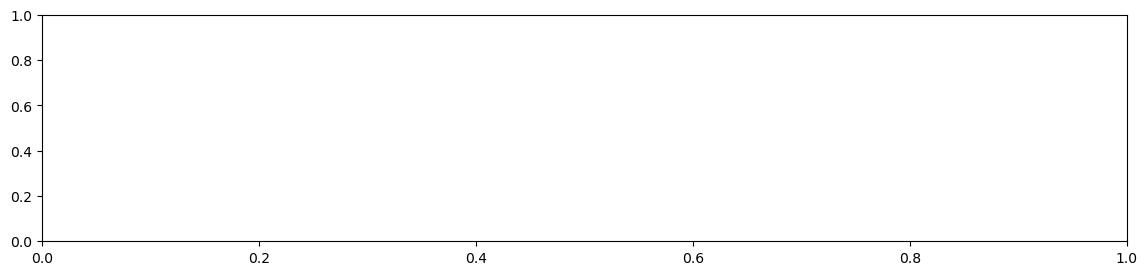

In [88]:

# compare models 

compare = pd.DataFrame(
    {
        "Model": ['model', 'model_l1', 'model_l2', 'model_dropout', 'model_layer', 'model_final'],
    
        'accuracy ' : [ m1[1], m2[1], m3[1], m4[1], m5[1], m6[1] ],
        'val_accuracy ': [m1[3], m2[3], m3[3], m4[3], m5[3], m6[3] ],
        'loss': [m1[0], m2[0], m3[0], m4[0], m5[0], m6[0] ],
        'val_loss':[m1[2], m2[2], m3[2], m4[2], m5[2], m6[2] ]
       
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="accuracy", ascending=False)
ax = sns.barplot(x="accuracy", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.figure(figsize=(14, 10))
plt.subplot(312)
compare = compare.sort_values(by="val_accuracy", ascending=False)
ax = sns.barplot(x="val_accuracy", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.figure(figsize=(14, 10))
plt.subplot(313)
compare = compare.sort_values(by="loss", ascending=False)
ax = sns.barplot(x="loss", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.figure(figsize=(14, 10))
plt.subplot(314)
compare = compare.sort_values(by="val_loss", ascending=False)
ax = sns.barplot(x="val_loss", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")



## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

highest accuracy droupout model 0.91 

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.88      0.85      1000
           3       0.93      0.91      0.92      1000
           4       0.83      0.87      0.85      1000
           5       0.97      0.99      0.98      1000
           6       0.78      0.72      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

-------------------------------------------------------------


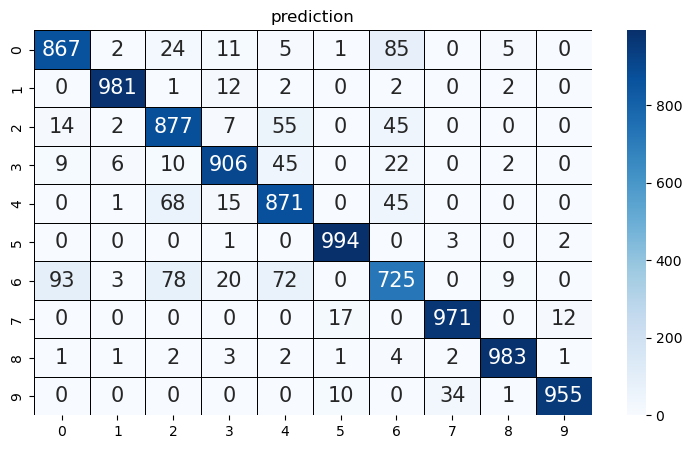

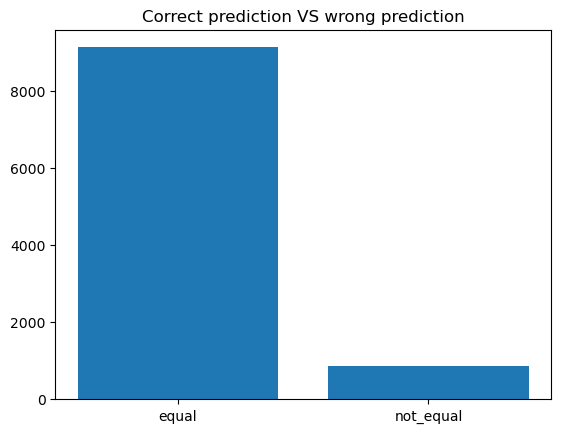

In [89]:
pred_prob = model_dropout.predict(X_test_s)
y_pred = np.argmax(pred_prob, axis=1)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="Blues",
        linewidths=0.5,
        linecolor="black",
        fmt="g",
        annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("\n")
equal = np.equal(y_test, y_pred).sum()
not_equal= np.not_equal(y_test, y_pred).sum()
plt.bar(['equal','not_equal'] , [equal,not_equal] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

## Prediction

In [90]:
X_test_s[7]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00784314],
        [0.01176471],
        [0.        ],
        [0.        ],
        [0.36862746],
        [0.5921569 ],
        [0.60784316],
        [0.5411765 ],
        [0.38431373],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.18039216],
        [1.        ],
        [0.77254903],
        [0.76862746],
        [0.7490196 ],
        [0.9843137 ],
        

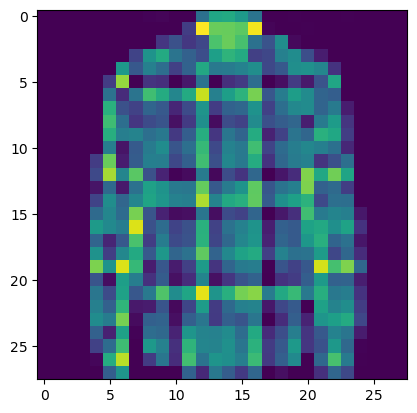

In [92]:
plt.imshow(X_test_s[7])
plt.show()

In [93]:
y_test[7]

6

In [94]:
classes[y_test[7]]

'Shirt'

In [95]:
X_predict = X_test_s[7]

In [96]:
X_test_s[7].shape

(28, 28, 1)

In [97]:
predicted_value = model_dropout.predict(np.expand_dims(X_test_s[7], 0))
predicted_value

1/1 [==============================] - 0s 17ms/step


array([[5.2302624e-14, 7.9611543e-14, 6.2408433e-12, 7.0062778e-10,
        2.1844397e-10, 1.3845386e-15, 1.0000000e+00, 2.0116372e-13,
        5.8271811e-11, 7.3231888e-17]], dtype=float32)

In [98]:
np.argmax(predicted_value)

6

Predicted value:  Shirt 
Real value : Shirt


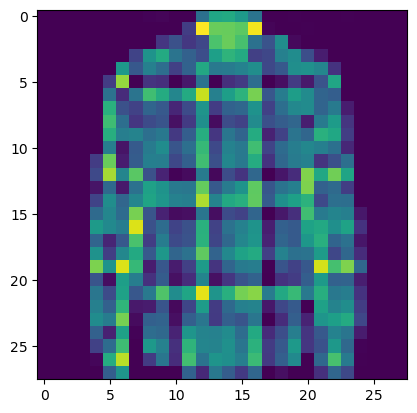

In [99]:

print('Predicted value: ', classes[np.argmax(predicted_value)],
      '\nReal value :', classes[y_test[7]])
plt.imshow(X_test_s[7]);

predection was correct 

References:
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___